In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.13.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from tensorflow import keras

In [5]:
from tensorflow.keras.preprocessing.image import load_img

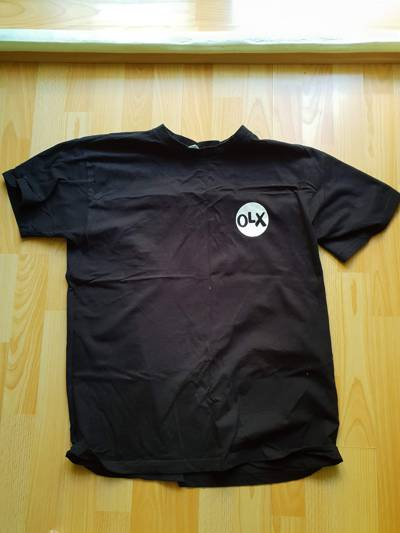

In [6]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [7]:
img = load_img(fullname, target_size = (299, 299))

In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [10]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [11]:
X = np.array([x])

In [12]:
X.shape

(1, 299, 299, 3)

In [13]:
X = preprocess_input(X)

In [14]:
pred = model.predict(X)

1/1 [==============================] - 5s 5s/step


In [15]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.68196297),
  ('n02916936', 'bulletproof_vest', 0.03814007),
  ('n04370456', 'sweatshirt', 0.03432477),
  ('n03710637', 'maillot', 0.011354234),
  ('n04525038', 'velvet', 0.0018453615)]]

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train', 
    target_size=(150, 150), 
    batch_size=32
    )

Found 3068 images belonging to 10 classes.


In [18]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [19]:
X, y = next(train_ds)

In [20]:
y[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [21]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train', 
    target_size=(150, 150), 
    batch_size=32
    )


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation', 
    target_size=(150, 150), 
    batch_size=32,
    shuffle=False 
    )

Found 341 images belonging to 10 classes.


In [22]:
base_model = Xception(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3)
    )
base_model.trainable = False


inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

output = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, output)

In [25]:
Learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=Learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [26]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 344s 3s/step - loss: 1.2432 - accuracy: 0.6682 - val_loss: 1.0021 - val_accuracy: 0.7126
Epoch 2/10
96/96 [==============================] - 286s 3s/step - loss: 0.5971 - accuracy: 0.8149 - val_loss: 1.1610 - val_accuracy: 0.7038
Epoch 3/10
96/96 [==============================] - 383s 4s/step - loss: 0.3701 - accuracy: 0.8765 - val_loss: 1.0197 - val_accuracy: 0.7801
Epoch 4/10
96/96 [==============================] - 403s 4s/step - loss: 0.2842 - accuracy: 0.8990 - val_loss: 0.8855 - val_accuracy: 0.8094
Epoch 5/10
96/96 [==============================] - 373s 4s/step - loss: 0.1468 - accuracy: 0.9475 - val_loss: 0.9633 - val_accuracy: 0.7859
Epoch 6/10
96/96 [==============================] - 389s 4s/step - loss: 0.0993 - accuracy: 0.9645 - val_loss: 0.8362 - val_accuracy: 0.8006
Epoch 7/10
96/96 [==============================] - 382s 4s/step - loss: 0.0666 - accuracy: 0.9795 - val_loss: 0.8852 - val_accuracy: 0.8240
Epoch 8/10
96

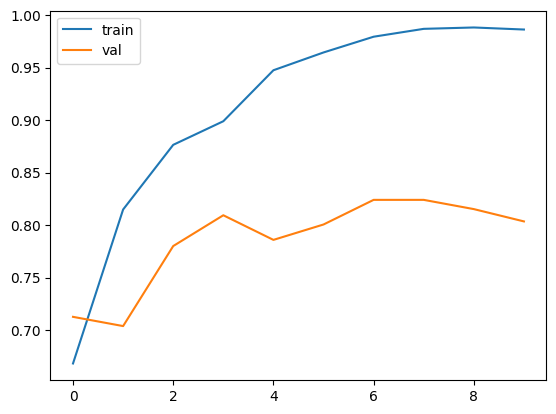

In [31]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'val')

plt.legend()

In [32]:
def make_model(Learning_rate=0.01):
    base_model = Xception(
        weights='imagenet', 
        include_top=False, 
        input_shape=(150, 150, 3)
        )
    base_model.trainable = False

###############################################################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    output = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, output)

###############################################################################

    optimizer = keras.optimizers.Adam(learning_rate=Learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [34]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(Learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001


Epoch 1/10
96/96 [==============================] - 386s 4s/step - loss: 1.8984 - accuracy: 0.3739 - val_loss: 1.5715 - val_accuracy: 0.5337
Epoch 2/10
96/96 [==============================] - 411s 4s/step - loss: 1.3767 - accuracy: 0.5714 - val_loss: 1.2344 - val_accuracy: 0.6334
Epoch 3/10
96/96 [==============================] - 444s 5s/step - loss: 1.1382 - accuracy: 0.6454 - val_loss: 1.0575 - val_accuracy: 0.7009
Epoch 4/10
96/96 [==============================] - 369s 4s/step - loss: 1.0013 - accuracy: 0.6877 - val_loss: 0.9486 - val_accuracy: 0.7243
Epoch 5/10
96/96 [==============================] - 267s 3s/step - loss: 0.9109 - accuracy: 0.7148 - val_loss: 0.8795 - val_accuracy: 0.7273
Epoch 6/10
96/96 [==============================] - 265s 3s/step - loss: 0.8430 - accuracy: 0.7376 - val_loss: 0.8257 - val_accuracy: 0.7537
Epoch 7/10
96/96 [==============================] - 264s 3s/step - loss: 0.7915 - accuracy: 0.7500 - val_loss: 0.7878 - val_accuracy: 0.7537
Epoch 8/10
96

In [38]:
del scores[0.1]
del scores[0.0001]

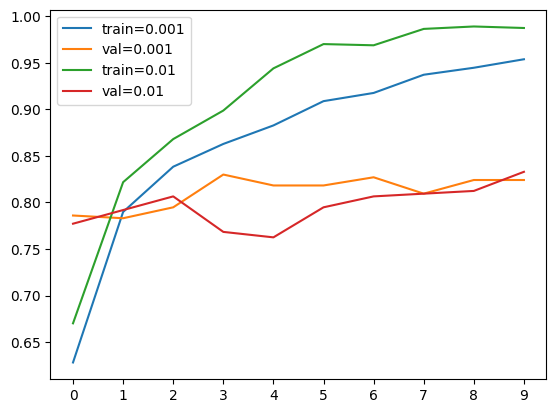

In [41]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label = ('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label = ('val=%s' % lr))
    

plt.xticks(np.arange(10))
plt.legend()
    

In [46]:
Learning_rate = 0.001

In [44]:
model.save_weights('model_v1.h5', save_format='h5')

In [45]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
    )

In [47]:
Learning_rate = 0.001

model = make_model(Learning_rate=Learning_rate)
history = model.fit(
    train_ds, 
    epochs=10, 
    validation_data=val_ds,
    callbacks=[checkpoint]
    )

Epoch 1/10
96/96 [==============================] - ETA: 0s - loss: 1.0850 - accuracy: 0.6294

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 476s 5s/step - loss: 1.0850 - accuracy: 0.6294 - val_loss: 0.6997 - val_accuracy: 0.7771
Epoch 2/10
96/96 [==============================] - 656s 7s/step - loss: 0.6228 - accuracy: 0.7881 - val_loss: 0.6245 - val_accuracy: 0.7947
Epoch 3/10
96/96 [==============================] - 500s 5s/step - loss: 0.5014 - accuracy: 0.8308 - val_loss: 0.6009 - val_accuracy: 0.7918
Epoch 4/10
96/96 [==============================] - 515s 5s/step - loss: 0.4293 - accuracy: 0.8634 - val_loss: 0.5747 - val_accuracy: 0.8035
Epoch 5/10
96/96 [==============================] - 428s 4s/step - loss: 0.3684 - accuracy: 0.8892 - val_loss: 0.5405 - val_accuracy: 0.8299
Epoch 6/10
96/96 [==============================] - 282s 3s/step - loss: 0.3222 - accuracy: 0.9084 - val_loss: 0.5517 - val_accuracy: 0.8065
Epoch 7/10
96/96 [==============================] - 311s 3s/step - loss: 0.2887 - accuracy: 0.9234 - val_loss: 0.5340 - val_accuracy: 0.8152
Epoch 8/10
96/96 [======

In [57]:
def make_model(Learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet', 
        include_top=False, 
        input_shape=(150, 150, 3)
        )
    base_model.trainable = False

###############################################################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    output = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, output)

###############################################################################

    optimizer = keras.optimizers.Adam(learning_rate=Learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [58]:
Learning_rate = 0.001
scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(Learning_rate=Learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10


Epoch 1/10
96/96 [==============================] - 454s 5s/step - loss: 1.4375 - accuracy: 0.5186 - val_loss: 0.9083 - val_accuracy: 0.7185
Epoch 2/10
96/96 [==============================] - 429s 4s/step - loss: 0.7755 - accuracy: 0.7438 - val_loss: 0.7350 - val_accuracy: 0.7595
Epoch 3/10
96/96 [==============================] - 362s 4s/step - loss: 0.5911 - accuracy: 0.8070 - val_loss: 0.6400 - val_accuracy: 0.7947
Epoch 4/10
96/96 [==============================] - 343s 4s/step - loss: 0.4803 - accuracy: 0.8409 - val_loss: 0.6176 - val_accuracy: 0.8006
Epoch 5/10
96/96 [==============================] - 392s 4s/step - loss: 0.4073 - accuracy: 0.8719 - val_loss: 0.5993 - val_accuracy: 0.8035
Epoch 6/10
96/96 [==============================] - 331s 3s/step - loss: 0.3446 - accuracy: 0.9016 - val_loss: 0.5849 - val_accuracy: 0.8123
Epoch 7/10
96/96 [==============================] - 312s 3s/step - loss: 0.2977 - accuracy: 0.9143 - val_loss: 0.5917 - val_accuracy: 0.8035
Epoch 8/10
96

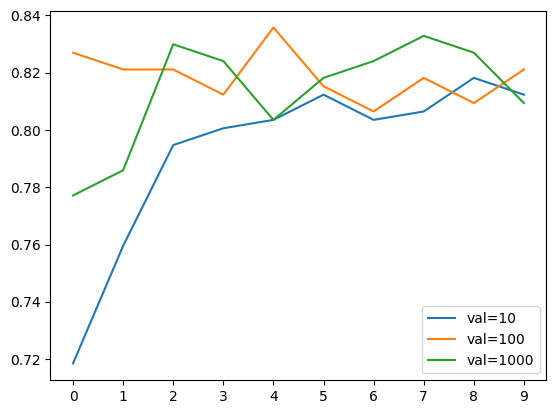

In [60]:
for size, hist in scores.items():
    #plt.plot(hist['accuracy'], label = ('train=%s' % size))
    plt.plot(hist['val_accuracy'], label = ('val=%s' % size))
    

plt.xticks(np.arange(10))
plt.legend()

In [66]:
def make_model(Learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet', 
        include_top=False, 
        input_shape=(150, 150, 3)
        )
    base_model.trainable = False

###############################################################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    output = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, output)

###############################################################################

    optimizer = keras.optimizers.Adam(learning_rate=Learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [67]:
Learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(Learning_rate=Learning_rate, size_inner=size, droprate=droprate)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0


Epoch 1/10
96/96 [==============================] - 468s 5s/step - loss: 0.9576 - accuracy: 0.6724 - val_loss: 0.7153 - val_accuracy: 0.7566
Epoch 2/10
96/96 [==============================] - 373s 4s/step - loss: 0.5321 - accuracy: 0.8077 - val_loss: 0.6360 - val_accuracy: 0.7889
Epoch 3/10
96/96 [==============================] - 375s 4s/step - loss: 0.3547 - accuracy: 0.8814 - val_loss: 0.6074 - val_accuracy: 0.7947
Epoch 4/10
96/96 [==============================] - 356s 4s/step - loss: 0.2571 - accuracy: 0.9208 - val_loss: 0.5845 - val_accuracy: 0.7918
Epoch 5/10
96/96 [==============================] - 396s 4s/step - loss: 0.1693 - accuracy: 0.9547 - val_loss: 0.6041 - val_accuracy: 0.8035
Epoch 6/10
96/96 [==============================] - 410s 4s/step - loss: 0.1288 - accuracy: 0.9707 - val_loss: 0.5849 - val_accuracy: 0.8035
Epoch 7/10
96/96 [==============================] - 484s 5s/step - loss: 0.0824 - accuracy: 0.9883 - val_loss: 0.6108 - val_accuracy: 0.8065
Epoch 8/10
96

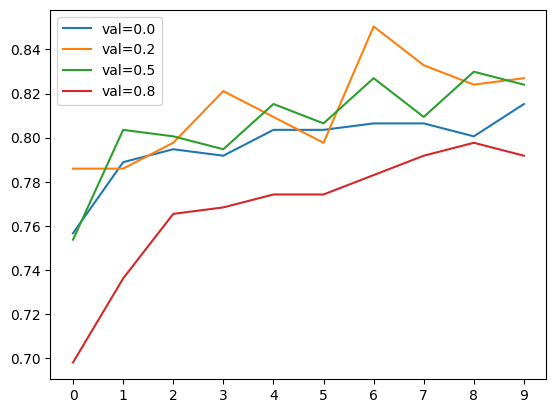

In [68]:
for droprate, hist in scores.items():
    #plt.plot(hist['accuracy'], label = ('train=%s' % droprate))
    plt.plot(hist['val_accuracy'], label = ('val=%s' % droprate))
    

plt.xticks(np.arange(10))
plt.legend()

In [69]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True
    )

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train', 
    target_size=(150, 150), 
    batch_size=32
    )

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation', 
    target_size=(150, 150), 
    batch_size=32,
    shuffle=False 
    )

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [71]:
Learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    Learning_rate=Learning_rate, 
    size_inner=size, 
    droprate=droprate
    )

history = model.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
96/96 [==============================] - 357s 4s/step - loss: 1.3153 - accuracy: 0.5655 - val_loss: 0.7812 - val_accuracy: 0.7331
Epoch 2/30
96/96 [==============================] - 329s 3s/step - loss: 0.9124 - accuracy: 0.6988 - val_loss: 0.6712 - val_accuracy: 0.7830
Epoch 3/30
96/96 [==============================] - 345s 4s/step - loss: 0.7640 - accuracy: 0.7477 - val_loss: 0.5980 - val_accuracy: 0.7918
Epoch 4/30
96/96 [==============================] - 338s 4s/step - loss: 0.7058 - accuracy: 0.7598 - val_loss: 0.6643 - val_accuracy: 0.7801
Epoch 5/30
96/96 [==============================] - 361s 4s/step - loss: 0.6399 - accuracy: 0.7790 - val_loss: 0.6266 - val_accuracy: 0.7771
Epoch 6/30
96/96 [==============================] - 353s 4s/step - loss: 0.6042 - accuracy: 0.7940 - val_loss: 0.6265 - val_accuracy: 0.7830
Epoch 7/30
96/96 [==============================] - 351s 4s/step - loss: 0.5595 - accuracy: 0.8103 - val_loss: 0.6000 - val_accuracy: 0.7947
Epoch 8/30
96

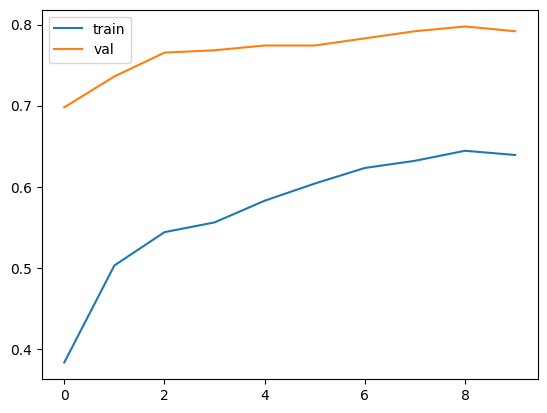

In [75]:
plt.plot(hist['accuracy'], label = 'train')
plt.plot(hist['val_accuracy'], label = 'val')

plt.legend()